# Multilinear regression

Multilinear regression generalizes simple linear regression:

$$
y_i = \beta_0 + \beta_1x_i
$$

to include more fitting variables when modelling $y_i' = \{y_1',y_2', ...,y_n'\}$

$$
y_i =\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}
$$

Or more generally using n independent variables:

$$
y_i =\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} +....+\beta_p x_{ip}
$$

For simplicity let us takes two variables:

$$
y_i =\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}
$$

This can be written in the compact form:

$$
\begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_n 
\end{bmatrix} 
=
\begin{bmatrix} 
1&x_{11} & x_{12}  \\ 
1&x_{21} & x_{22}  \\ 
\vdots & \vdots &  \vdots \\ 
1&x_{n1} & x_{n2}  
\end{bmatrix} 
\begin{bmatrix} 
\beta_0 \\ 
\beta_1 \\ 
\beta_2 
\end{bmatrix} 
$$

or :

$$
Y = X\mathbf{\beta}
$$

with:

$$
Y= \begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_n 
\end{bmatrix}
$$




$$
X= \begin{bmatrix} 
1&x_{11} & x_{12}  \\ 
1&x_{21} & x_{22}  \\ 
\vdots & \vdots &  \vdots \\ 
1&x_{n1} & x_{n2}  
\end{bmatrix} 
$$

$$
\beta =\begin{bmatrix} 
 \beta_0 \\ 
\beta_1 \\ 
\beta_2 
\end{bmatrix} 
$$

# Least squares method

we want to optimize the coefficients $\beta$ to make the best model for the data $Y'$:

$$
Y = X\mathbf{\beta}
$$



We want to minimze the quantity:

$$
loss = \left \lVert Y'-X\beta \right \lVert^2 = \sum_{i=1}^n (y_i' -(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2}))^2 
$$
$$
loss = (Y'-X\beta)^T(Y'-X\beta)
$$
$$
loss = Y'^TY-Y'^TX\beta-\beta^TX^TY'+ \beta^TX^TX\beta
$$
$$
\frac{\partial loss}{\partial\beta} = -2X^TY'+2X^TX\beta
$$

The  optimized weights are then:

We can write this in the compact form:

$$
\beta = (X^TX)^{-1}X^TY'
$$

# Example: real estate prices prediction

In [11]:
import pandas as pd
df = pd.read_csv('Real estate.csv')
del df['X1 transaction date']
del df['X5 latitude']
del df['X6 longitude']


In [13]:
df.head()

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,1,32.0,84.87882,10,37.9
1,2,19.5,306.59470,9,42.2
2,3,13.3,561.98450,5,47.3
3,4,13.3,561.98450,5,54.8
4,5,5.0,390.56840,5,43.1


In [15]:
# correlation function 
df.corr()

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
No,1.000000,-0.032808,-0.013573,-0.012699,-0.028587
X2 house age,-0.032808,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.012699,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,-0.028587,-0.210567,-0.673613,0.571005,1.000000


The model is:

$$ y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3_i}
$$

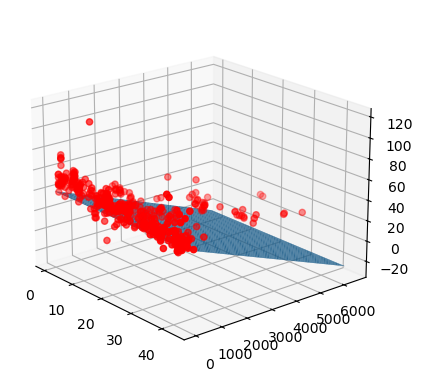

In [18]:
import matplotlib.pyplot as plt
import numpy as np



x1 = df['X2 house age']
x2 = df['X3 distance to the nearest MRT station']
x3 = df['X4 number of convenience stores']
y = df['Y house price of unit area']
dim1 = np.linspace(min(x1), max(x1),100)
dim2 = np.linspace(min(x2), max(x2),100)
X,Y = np.meshgrid(dim1,dim2)
z = -0.01*X-0.01*Y+40
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y,z)
ax.scatter(x1,x2,y, color = "red")
ax.view_init(20, -40)


In [60]:
x1_train = np.array(x1)[:len(x1)//2]
x2_train = np.array(x2)[:len(x2)//2]
x3_train = np.array(x3)[:len(x3)//2]
x1_test = np.array(x1)[len(x1)//2:len(x1)//2 +3]
x2_test = np.array(x2)[len(x2)//2:len(x1)//2 +3]
x3_test = np.array(x3)[len(x3)//2:len(x1)//2 +3]
X_train = np.column_stack((np.ones(len(x1_train)), x1_train, x2_train, x3_train))
X_test = np.column_stack((np.ones(len(x1_test)), x1_test, x2_test, x3_test))
y_train = y[:len(y)//2]

$$
\begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_n 
\end{bmatrix} 
=
\begin{bmatrix} 
x_{11} & x_{12} & \dots & x_{1p} \\ 
x_{21} & x_{22} & \dots & x_{2p} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
x_{n1} & x_{n2} & \dots & x_{np} 
\end{bmatrix} 
\begin{bmatrix} 
\beta_0 \\ 
\beta_1 \\ 
\vdots \\ 
\beta_p 
\end{bmatrix} 
+
\begin{bmatrix} 
\epsilon_1 \\ 
\epsilon_2 \\ 
\vdots \\ 
\epsilon_n 
\end{bmatrix} 
$$

For simplicity let us takes two variables:



Intercept (β0): 44.280163620199914
Coefficient for x1 (β1): -0.306315019221862
Coefficient for x2 (β2): -0.005285029255371228


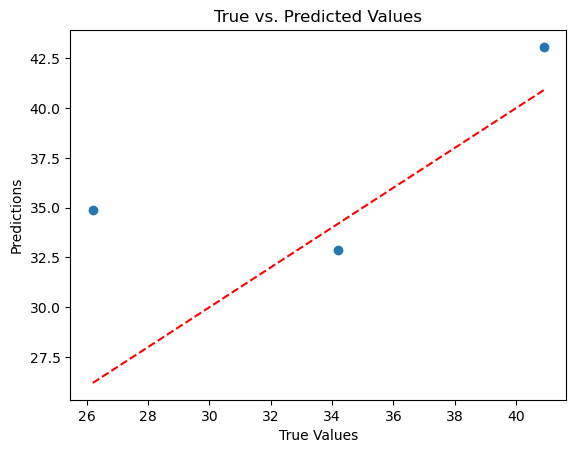

In [63]:
XtX = X_train.T.dot(X_train)              # X^T * X
XtX_inv = np.linalg.inv(XtX)  # (X^T * X)^(-1)
XtY = X_train.T.dot(y_train)              # X^T * y
beta = XtX_inv.dot(XtY)       # (X^T * X)^(-1) * X^T * y'

# Extracting coefficients
intercept = beta[0]
coef_x1 = beta[1]
coef_x2 = beta[2]

print("Intercept (β0):", intercept)
print("Coefficient for x1 (β1):", coef_x1)
print("Coefficient for x2 (β2):", coef_x2)

# Step 3: Predicting y values
y_pred = X_test.dot(beta)
y_test = y[len(y)//2:len(y)//2 + 3 ]
# Optional: Plot results (y vs. y_pred)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values")
plt.show()

In [65]:
len(y_test)

3

In [67]:
mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R2)
ss_total = np.sum((y_test - np.mean(y)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 4.057404312476932
Mean Squared Error (MSE): 27.199349873515533
Root Mean Squared Error (RMSE): 5.215299595758189
R-squared (R2): 0.49502434197557865


In [39]:
ss_total = np.sum((y_test - np.mean(y)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Number of observations and predictors
n = len(y)
p = 2  # Number of predictors (independent variables: x1 and x2)

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


ValueError: operands could not be broadcast together with shapes (5,) (10,) 